# Distributions

Think Bayes, Second Edition

Copyright 2020 Allen B. Downey

License: [Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/)

In [1]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [2]:
# Get utils.py

import os

if not os.path.exists('utils.py'):
    !wget https://github.com/AllenDowney/ThinkBayes2/raw/master/code/soln/utils.py

## Introduction



## Distributions

In statistics a **distribution** is a set of values and their
corresponding probabilities.

For example, if you toss a coin, there are two possible outcomes with
approximately equal probabilities.

If you roll a six-sided die, the set of possible values is the numbers 1
to 6, and the probability associated with each value is 1/6.

To represent distributions, we'll use a library called `empiricaldist`.
An "empirical" distribution is based on data, as opposed to a
theoretical distribution.

This library provides a class called `Pmf`, which represents a
**probability mass function**.

`empiricaldist` is available from the Python Package Index (PyPI). You
can [download it here](https://pypi.org/project/empiricaldist/) or
install it with `pip`. For more details, see the Preface.

To use `Pmf` you can import it like this:

In [3]:
from empiricaldist import Pmf

The following example makes a `Pmf` that represents the outcome of a
coin toss.

In [4]:
coin = Pmf()
coin['heads'] = 1/2
coin['tails'] = 1/2
coin

heads    0.5
tails    0.5
dtype: float64

The two outcomes have the same probability, $0.5$.

This example makes a `Pmf` that represents the distribution of outcomes
of a six-sided die:

In [5]:
die = Pmf()
for x in [1,2,3,4,5,6]:
    die[x] = 1
    
die

1    1
2    1
3    1
4    1
5    1
6    1
dtype: int64

`Pmf` creates an empty `Pmf` with no values. The `for` loop adds the
values $1$ through $6$, each with "probability" $1$.

In this `Pmf`, the probabilities don't add up to 1, so they are not
really probabilities. We can use `normalize` to make them add up to 1.

In [6]:
die.normalize()

6

The return value from `normalize` is the sum of the probabilities before normalizing.

Now we can see that the total is 1 (at least within floating-point error).

In [7]:
die

1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.166667
6    0.166667
dtype: float64

In [8]:
die.sum()

0.9999999999999999

Another way make a `Pmf` is to provide a sequence of values.

In this example, every value appears once, so they all have the same probability.

In [9]:
die = Pmf.from_seq([1,2,3,4,5,6])
die

1    0.166667
2    0.166667
3    0.166667
4    0.166667
5    0.166667
6    0.166667
dtype: float64

More generally, values can appear more than once, as in this example:

In [10]:
letters = Pmf.from_seq(list('Mississippi'))
letters

M    0.090909
i    0.363636
p    0.181818
s    0.363636
dtype: float64


The `Pmf` class inherits from a Pandas `Series`, so anything you can do
with a `Series`, you can also do with a `Pmf`.

For example, you can use the bracket operator to look up a value and
returns the corresponding probability.

In [11]:
letters['s']

0.36363636363636365

In the word "Mississippi", about 36% of the letters are "s".

However, if you ask for the probability of a value that's not in the
distribution, you get a `KeyError`.



In [12]:
try:
    letters['t']
except KeyError as e:
    print('KeyError')

KeyError


You can also call a `Pmf` as if it were a function, with a value in parentheses.

In [13]:
letters('s')

0.36363636363636365

If the value is in the distribution the results are the same. 
But if the value is not in the distribution, the result is $0$, not an error.

In [14]:
letters('t')

0

With parentheses, you can also provide a sequence of values and get a sequence of probabilities.

In [15]:
die([1,4,7])

array([0.16666667, 0.16666667, 0.        ])

As these examples shows, the values in a `Pmf` can be integers or strings. In general, they can be any type that can be stored in the index of a Pandas `Series`.

If you are familiar with Pandas, that will help you work with `Pmf` objects. But I will explain what you need to know as we go along.

## The cookie problem

In this section I'll use a `Pmf` to solve the cookie problem from Section XX.
Here's the statement of the problem again:

> Suppose there are two bowls of cookies.
> Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies.
> Bowl 2 contains 20 of each.
>
> Now suppose you choose one of the bowls at random and, without
> looking, select a cookie at random. The cookie is vanilla. What is
> the probability that it came from Bowl 1?

Here's a `Pmf` that represents the two hypotheses and their prior probabilities:

In [16]:
prior = Pmf.from_seq(['Bowl 1', 'Bowl 2'])
prior

Bowl 1    0.5
Bowl 2    0.5
dtype: float64

This distribution, which contains the prior probability for each hypothesis, is called (wait for it) the **prior distribution**.

To update the distribution based on new data (the vanilla cookie),
we multiply the priors by the likelihoods. The likelihood
of drawing a vanilla cookie from Bowl 1 is `3/4`. The likelihood
for Bowl 2 is `1/2`.

In [17]:
likelihood_vanilla = [0.75, 0.5]
posterior = prior * likelihood_vanilla
posterior

Bowl 1    0.375
Bowl 2    0.250
dtype: float64

The result is the unnormalized posteriors.
We can use `normalize` to compute the posterior probabilities:

In [18]:
posterior.normalize()

0.625

The return value from `normalize` is the total probability of the data, which is $5/8$.

`posterior`, which contains the posterior probability for each hypothesis, is called (wait now) the **posterior distribution**.

In [19]:
posterior

Bowl 1    0.6
Bowl 2    0.4
dtype: float64

From the posterior distribution we can select the posterior probability for Bowl 1:

In [20]:
posterior('Bowl 1')

0.6

And the answer is 0.6.

One benefit of using `Pmf` objects is that it is easy to do successive updates with more data.
For example, suppose you put the first cookie back (so the contents of the bowls don't change) and draw again from the same bowl.
If the second cookie is also vanilla, we can do a second update like this:

In [21]:
posterior *= likelihood_vanilla
posterior.normalize()
posterior

Bowl 1    0.692308
Bowl 2    0.307692
dtype: float64

Now the posterior probability for Bowl 1 is almost 70%.
But suppose we do the same thing again and get a chocolate cookie.
Here's the update.

In [22]:
likelihood_chocolate = [0.25, 0.5]
posterior *= likelihood_chocolate
posterior.normalize()
posterior

Bowl 1    0.529412
Bowl 2    0.470588
dtype: float64

Now the posterior probability for Bowl 1 is about 53%.
After two vanilla cookies and one chocolate, the posterior probabilities are close to 50/50.

## 101 Bowls

Next let's solve a cookie problem with 101 bowls:

* Bowl 0 contains no vanilla cookies,

* Bowl 1 contains 1% vanilla cookies,

* Bowl 2 contains 2% vanilla cookies,

and so on, up to

* Bowl 99 contains 99% vanilla cookies, and

* Bowl 100 contains all vanilla cookies.

As in the previous version, there are only two kinds of cookies, vanilla and chocolate.  So Bowl 0 is all chocolate cookies, Bowl 1 is 99% chocolate, and so on.

Suppose we choose a bowl at random, choose a cookie at random, and it turns out to be vanilla.  What is the probability that the cookie came from Bowl $x$, for each value of $x$?

To solve this problem, I'll use `np.arange` to represent 101 hypotheses, numbered from 0 to 100.

In [23]:
import numpy as np

hypos = np.arange(101)

The result is a NumPy array, which we can use to make the prior distribution:

In [24]:
prior = Pmf(1, hypos)
prior.normalize()

101

As this example shows, we can initialize a `Pmf` with two parameters.
The first parameter is the prior probability; the second parameter is a sequence of values.

In this example, the probabilities are all the same, so we only have to provide one of them; it gets "broadcast" across the hypotheses.

Since all hypotheses have the same prior probability, this distribution is **uniform**.

The likelihood of the data is the fraction of vanilla cookies in each bowl, which we can calculate using `hypos`:

In [25]:
likelihood_vanilla = hypos/100

Now we can compute the posterior distribution in the usual way:


In [26]:
posterior1 = prior * likelihood_vanilla
posterior1.normalize()

0.5000000000000001

The following figure shows the prior distribution and the posterior distribution after one vanilla cookie.

In [27]:
from utils import decorate, savefig

def decorate_bowls(title):
    decorate(xlabel='Bowl #',
             ylabel='PMF',
             title=title)

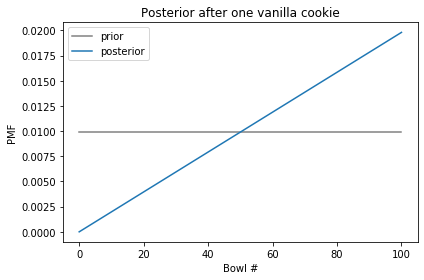

In [28]:
prior.plot(label='prior', color='gray')
posterior1.plot(label='posterior')
decorate_bowls('Posterior after one vanilla cookie')

The posterior probability of Bowl 0 is 0 because it contains no vanilla cookies.
The posterior probability of Bowl 100 is the highest because it contain the most vanilla cookies.
In between, the shape of the posterior distribution is a line because the the likelihoods are proportional to the bowl numbers.

Now suppose we put the cookie back, draw again from the same bowl, and get another vanilla cookie.
Here's the update after the second cookie:

In [29]:
posterior2 = posterior1 * likelihood_vanilla
posterior2.normalize()

0.6699999999999999

And here's what the posterior distribution looks like.

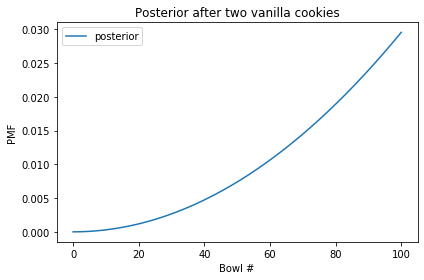

In [30]:
posterior2.plot(label='posterior')
decorate_bowls('Posterior after two vanilla cookies')

%TODO improve this transition...

Because the likelihood function is a line, the posterior after two cookies is a parabola.
At this point the high-numbered bowls are the most likely because they contain the most vanilla cookies, and the low-numbered bowls have been all but eliminated.

Now suppose we draw again and get a chocolate cookie.
Here's the update:

In [31]:
likelihood_chocolate = 1 - hypos/100

posterior3 = posterior2 * likelihood_chocolate
posterior3.normalize()

0.2462686567164179

And here's the posterior distribution.

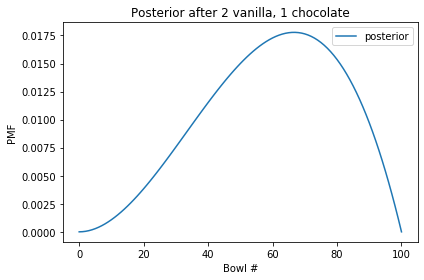

In [32]:
posterior3.plot(label='posterior')
decorate_bowls('Posterior after 2 vanilla, 1 chocolate')

Now Bowl 100 has been eliminated because it contains no chocolare cookies.
But the high-numbered bowls are still more likely than the low-numbered bowls, because we have seen more vanilla cookies than chocolate.

In fact, the peak of the posterior distribution is at Bowl 67, which corresponds to the fraction of vanilla cookies in the data we've observed, $2/3$.

The quantity with the highest posterior probability is called the **MAP**, which stands for "maximum a posteori probability", where "a posteori" is unnecessary Latin for "posterior".

To compute the MAP, we can use the `Series` method `idxmax`:

In [33]:
posterior3.idxmax()

67

Or `Pmf` provides a more memorable name for the same thing:

In [34]:
posterior3.max_prob()

67

As you might suspect, this example isn't really about bowls; it's about estimating proportions.
Imagine that you have one bowl of cookies.
You don't know what fraction of cookies are vanilla, but you think it is equally likely to be any fraction from 0 to 1.
If you draw three cookies and two are vanilla, what proportion of cookies in the bowl do you think are vanilla?
The posterior distribution we just computed is the answer to that question.

We'll come back to estimating proportions in the next chapter.
But first let's use a `Pmf` to solve the dice problem.

Here's a figure for the book.

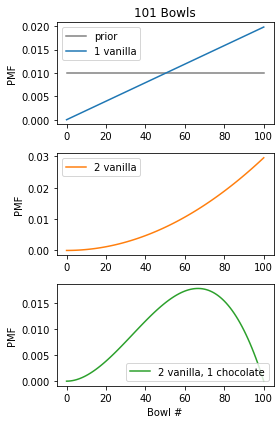

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 6))
plt.subplot(311)
prior.plot(label='prior', color='gray')
posterior1.plot(label='1 vanilla', color='C0')
plt.ylabel('PMF')
plt.title('101 Bowls')
plt.legend()

plt.subplot(312)
posterior2.plot(label='2 vanilla', color='C1')
plt.ylabel('PMF')
plt.legend()

plt.subplot(313)
posterior3.plot(label='2 vanilla, 1 chocolate', color='C2')
decorate_bowls('')

savefig('fig02-01')

## The dice problem

In the previous chapter we solved the dice problem using a Bayes table.
Here's the statement of the problem again:

> Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.
> I choose one of the dice at random, roll it, and report that the outcome is a 1.
> What is the probability that I chose the 6-sided die?

Let's solve it again using a `Pmf`.
I'll use integers to represent the hypotheses:

In [36]:
hypos = [6, 8, 12]

And I can make the prior distribution like this:


In [37]:
prior = Pmf(1/3, hypos)
prior

6     0.333333
8     0.333333
12    0.333333
dtype: float64

As in the previous example, the prior probability gets broadcast across the hypotheses.

Now we can compute the likelihood of the data:

In [38]:
likelihood1 = 1/6, 1/8, 1/12

And use it to compute the posterior distribution.


In [39]:
posterior = prior * likelihood1
posterior.normalize()
posterior

6     0.444444
8     0.333333
12    0.222222
dtype: float64

The posterior probability for the 6-sided die is $4/9$.

Now suppose I roll the same die again and get a $7$.
Here are the likelihoods:

In [40]:
likelihood2 = 0, 1/8, 1/12

The likelihood for the 6-sided die is $0$ because it is not possible to get a 7 on a 6-sided die.
The other two likelihoods are the same as in the previous update.

Now we can do the update in the usual way:

In [41]:
posterior *= likelihood2
posterior.normalize()
posterior

6     0.000000
8     0.692308
12    0.307692
dtype: float64

After rolling a 1 and a 7, the posterior probability of the 8-sided die is about 69%.

One note about the `Pmf` class: if you multiply a `Pmf` by a sequence, the result is a `Pmf`:

In [42]:
type(prior * likelihood1)

empiricaldist.empiricaldist.Pmf

If you do it the other way around, the result is a `Series`:

In [43]:
type(likelihood1 * prior)

pandas.core.series.Series

We usually want the posterior distribution to be a `Pmf`, so I usually put the prior first.  But even if we do it the other way, we can use `Pmf` to convert the result to a `Pmf`:

In [44]:
Pmf(likelihood1 * prior)

6     0.055556
8     0.041667
12    0.027778
dtype: float64

## Updating dice

The following function is a more general version of the update in the previous section:

In [45]:
def update_dice(pmf, data):
    """Update a pmf based on new data.
    
    pmf: Pmf of possible dice and their probabilities
    data: integer outcome
    """
    hypos = pmf.qs
    likelihood = 1 / hypos
    impossible = (data > hypos)
    likelihood[impossible] = 0
    pmf *= likelihood
    pmf.normalize()

The first parameter is a `Pmf` that represents the possible dice and their probabilities.
The second parameter is the outcome of rolling a die.

The first line selects `qs` from the `Pmf`, which is the index of the `Series`; in this example, it represents the hypotheses.

Since the hypotheses are integers, we can use them to compute the likelihoods.
In general, if there are `n` sides on the die, the probability of any possible outcome is `1/n`.

However, we have to check for impossible outcomes!
If the outcome exceeds the hypothetical number of sides on the die, the probability of that outcome is $0$.

`impossible` is a Boolean Series that is `True` for each impossible die.
I use it as an index into `likelihood` to set the corresponding probabilities to $0$.

Finally, I multiply `pmf` by the likelihoods and normalize.

Here's how we can use this function to compute the updates in the previous section.
I start with a fresh copy of the prior distribution:


In [46]:
pmf = prior.copy()
pmf

6     0.333333
8     0.333333
12    0.333333
dtype: float64

And use `update_dice` to do the updates.

In [47]:
update_dice(pmf, 1)
update_dice(pmf, 7)
pmf

6     0.000000
8     0.692308
12    0.307692
dtype: float64

The result is the same.


## Summary

This chapter introduces the `empiricaldist` module, which provides `Pmf`, which we use to represent a set of hypotheses and their probabilities.

We use a `Pmf` to solve the cookie problem and the dice problem, which we saw in the previous chapter.
With a `Pmf` it is easy to perform sequential updates as we see multiple pieces of data.

We also solved a more general version of the cookie problem, with 101 bowls rather than two.
Then we computed the MAP, which is the quantity with the highest posterior probability.

In the next chapter \...

But first you might want to work on the exercises.

## Exercises

**Exercise:** Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die.
I choose one of the dice at random, roll it four times, and get 1, 3, 5, and 7.
What is the probability that I chose the 8-sided die?

In [48]:
# Solution

pmf = prior.copy()
for data in [1, 3, 5, 7]:
    update_dice(pmf, data)
    
pmf

6     0.000000
8     0.835052
12    0.164948
dtype: float64

**Exercise:** In the previous version of the dice problem, the prior probabilities are the same because the box contains one of each die.
But suppose the box contains 1 die that is 4-sided, 2 dice that are 6-sided, 3 dice that are 8-sided, 4 dice that are 12-sided, and 5 dice that are 20-sided.
I choose a die, roll it, and get a 7.  
What is the probability that I chose an 8-sided die?

In [49]:
# Solution

ps = [1,2,3,4,5]
qs = [4,6,8,12,20]
pmf = Pmf(ps, qs)
update_dice(pmf, 7)
pmf

4     0.000000
6     0.000000
8     0.391304
12    0.347826
20    0.260870
dtype: float64

**Exercise:** Suppose I have two sock drawers.  
One contains equal numbers of black and white socks.  
The other contains equal numbers of red, green, and blue socks.
Suppose I choose a drawer at random, choose two socks at random, and I tell you that I got a matching pair.
What is the probability that the socks are white?

For simplicity, let's assume that there are so many socks in both drawers that removing one sock makes a negligible change to the proportions.

In [50]:
# Solution

# In the BlackWhite drawer, the probability of getting a match is 1/2
# In the RedGreenBlue drawer, the probability of a match is 1/3

hypos = ['BlackWhite', 'RedGreenBlue']
prior = Pmf(1/2, hypos)
likelihood = 1/2, 1/3
posterior = prior * likelihood
posterior.normalize()
posterior

BlackWhite      0.6
RedGreenBlue    0.4
dtype: float64

In [51]:
# Solution

# If I drew from the BlackWhite drawer, the probability the
# socks are white is 1/2

posterior['BlackWhite'] / 2

0.30000000000000004

**Exercise:** Here's a problem from [Bayesian Data Analysis](http://www.stat.columbia.edu/~gelman/book/):

> Elvis Presley had a twin brother (who died at birth). What is the probability that Elvis was an identical twin?

Hint: In 1935, about 2/3 of twins were fraternal and 1/3 were identical.

In [52]:
# Solution

# The trick to this question is to notice that Elvis's twin was a brother.
# If they were identical twins, it is certain they would be the same sex.
# If they were fraternal twins, the likelihood is only 50%.

# Here's a solution using a Bayes table

import pandas as pd

table = pd.DataFrame(index=['identical', 'fraternal'])
table['prior'] = 1/3, 2/3
table['likelihood'] = 1, 1/2

table['unnorm'] = table['prior'] * table['likelihood']
prob_data = table['unnorm'].sum()

table['posterior'] = table['unnorm'] / prob_data
table

prior  likelihood    unnorm  posterior
identical  0.333333         1.0  0.333333        0.5
fraternal  0.666667         0.5  0.333333        0.5

In [54]:
# Solution

# Here's a solution using a Pmf

hypos = ['identical', 'fraternal']
prior = Pmf([1/3, 2/3], hypos)
prior

identical    0.333333
fraternal    0.666667
dtype: float64

In [55]:
# Solution

likelihood = 1, 1/2
posterior = prior * likelihood
posterior.normalize()
posterior

identical    0.5
fraternal    0.5
dtype: float64